In [11]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from sklearn.metrics import cohen_kappa_score, confusion_matrix

import seaborn as sns

In [2]:
np.random.seed(0)

In [3]:
df = pd.read_csv('./data/train.csv').set_index('image_id').sort_index()
df.head()

,data_provider,isup_grade,gleason_score
image_id,,,
0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4
001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4
001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0


In [4]:
y_true = df.loc[:, 'isup_grade']

In [5]:
print(f'Labels range: {y_true.min()} - {y_true.max()}')

Labels range: 0 - 5


#### Kappa with exact predictions

In [6]:
cohen_kappa_score(y_true, y_true, weights='quadratic')

1.0

#### Kappa with random predictions

In [74]:
y_pred = np.random.randint(0, 6, size=y_true.shape)
y_pred = y_true + np.random.randint(-2,3,size=y_true.shape)
y_pred = np.clip(y_pred, 0, 5)

In [75]:
cohen_kappa_score(y_true, y_pred, weights='quadratic')

0.7712151464762984

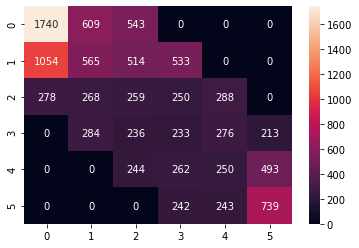

In [76]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d')